# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                     'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
                                    'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
                                    'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75'])
            


# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,contr_r_MIN,contr_r_MAX,contr_r_MEAN,...,contr_g_Q25,contr_g_Q50,contr_g_Q75,contr_b_MIN,contr_b_MAX,contr_b_MEAN,contr_b_STD,contr_b_Q25,contr_b_Q50,contr_b_Q75
0,6.824,9.240,1912,784,-0.73,2.58,2.33,9.481502,2933.677734,777.847542,...,541.256531,758.050110,1005.026367,9.379507,2713.600586,714.067764,332.963753,491.215576,684.545654,905.462463
1,8.189,9.622,2005,818,0.59,2.92,2.47,19.005865,1899.343872,833.407834,...,647.693115,887.856567,1150.706665,21.591255,1793.493042,766.078570,293.868420,563.713623,752.421997,964.777466
2,8.380,9.589,2001,818,0.78,2.88,2.44,94.267365,1968.408691,773.760888,...,588.255676,807.596130,1068.899292,80.702988,1761.097900,712.133098,272.526176,512.197632,689.422424,889.748047
3,8.137,9.449,2040,833,0.52,2.72,2.55,7.355157,2904.958740,711.545976,...,505.498962,732.743347,998.011780,9.797089,2518.435303,667.910072,299.595643,447.296204,641.451294,856.946899
4,7.696,9.401,1758,717,0.22,2.83,2.14,13.352172,3133.709961,806.127650,...,590.198303,842.132568,1103.787231,14.283794,2525.819336,755.761384,327.599176,527.639099,746.745300,968.327698


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   contr_r_MIN    103 non-null    float64
 8   contr_r_MAX    103 non-null    float64
 9   contr_r_MEAN   103 non-null    float64
 10  contr_r_STD    103 non-null    float64
 11  contr_r_Q25    103 non-null    float64
 12  contr_r_Q50    103 non-null    float64
 13  contr_r_Q75    103 non-null    float64
 14  contr_g_MIN    103 non-null    float64
 15  contr_g_MAX    103 non-null    float64
 16  contr_g_MEAN   103 non-null    float64
 17  contr_g_STD    103 non-null    float64
 18  contr_g_Q2

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_7460/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,contr_r_MIN,contr_r_MAX,contr_r_MEAN,...,contr_g_Q25,contr_g_Q50,contr_g_Q75,contr_b_MIN,contr_b_MAX,contr_b_MEAN,contr_b_STD,contr_b_Q25,contr_b_Q50,contr_b_Q75
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,29.534919,2511.986354,766.000754,...,641.169153,901.502855,1180.985742,32.391008,2712.352866,827.695538,349.854034,584.146224,811.233079,1047.783981
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,49.649243,1340.330498,402.724570,...,240.919219,300.935943,358.329636,46.420771,864.116297,251.466656,93.673105,216.532754,263.192567,306.704451
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,-0.027178,0.805054,0.417302,...,128.989090,186.037750,262.800140,0.531948,832.155518,199.382755,109.232976,120.188545,175.167770,252.607666
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,1.742763,1978.231751,633.735958,...,495.765656,723.074707,979.669098,5.277856,2123.614868,667.868117,292.544440,447.856689,639.053284,855.619751
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,7.970921,2722.256592,858.911069,...,640.676514,901.381104,1202.431396,15.266269,2601.248047,831.486847,341.904211,563.713623,815.357056,1063.953491
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,33.764453,3268.150146,1065.068586,...,842.500641,1117.960938,1428.865540,46.832664,3045.944336,1039.339119,427.359073,759.041443,1030.824829,1273.864319
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,249.526947,6225.004394,1586.523806,...,1251.066162,1681.644287,2124.060303,246.557938,6252.923340,1462.557110,588.661708,1150.023315,1473.567871,1833.971802


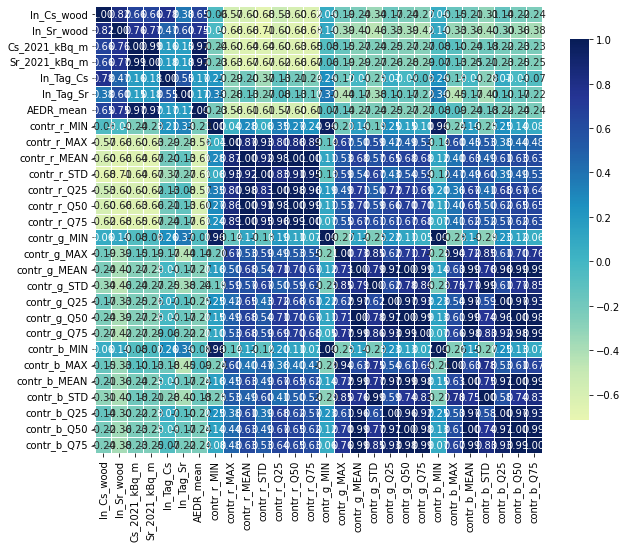

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75'])
y = pd.DataFrame(select, columns= ['ln_Tag_Cs'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [10]:
# Columns in "X" data collections
X.head()

,contr_r_MIN,contr_r_MAX,contr_r_MEAN,contr_r_STD,contr_r_Q25,contr_r_Q50,contr_r_Q75,contr_g_MIN,contr_g_MAX,contr_g_MEAN,...,contr_b_MEAN,contr_b_STD,contr_b_Q25,contr_b_Q50,contr_b_Q75,Random1,Random2,Random3,Random4,Random5
0,9.481502,2933.677734,777.847542,360.273487,536.306519,746.253296,982.211853,9.634772,2961.898193,793.726915,...,714.067764,332.963753,491.215576,684.545654,905.462463,12.824010,8.305600,9.607411,8.239326,10.802564
1,19.005865,1899.343872,833.407834,323.958625,603.536560,815.666809,1054.089966,17.242392,2218.239746,907.262181,...,766.078570,293.868420,563.713623,752.421997,964.777466,10.329417,9.534188,8.786029,14.174154,11.595471
2,94.267365,1968.408691,773.760888,299.438354,551.243347,745.311951,971.663940,81.325912,2220.297119,841.001715,...,712.133098,272.526176,512.197632,689.422424,889.748047,10.765645,10.936020,10.677544,8.992943,9.916622
3,7.355157,2904.958740,711.545976,319.773395,475.958679,681.415588,912.117859,7.830567,3033.770752,772.110070,...,667.910072,299.595643,447.296204,641.451294,856.946899,13.132316,13.309456,9.346222,12.147518,8.933207
4,13.352172,3133.709961,806.127650,353.104284,557.816040,790.760193,1027.114380,13.923030,3003.818848,862.516837,...,755.761384,327.599176,527.639099,746.745300,968.327698,8.207639,7.492557,11.661707,11.411830,10.110982


In [11]:
# Columns in "y" data collections
y.head()

,ln_Tag_Cs
0,-0.73
1,0.59
2,0.78
3,0.52
4,0.22


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.3055616164503976, -0.17783601657592585, -0.3745622229857761]
    Mean: -0.286
    Std: 0.081

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.36064011 1.04813414 1.26944058]
    Mean: 1.226
    Std: 0.131

 --------------------
Mean absolute error (MAE): 

    Scores: [0.937955553495458, 1.0588193725044015, 0.8868610469410744]
    Mean: 0.961
    Std: 0.072

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=10, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model with rank: 1
Mean validation score: -0.278 (std: 0.484)
Parameters: {'colsample_bytree': 0.8857900632173091, 'gamma': 0.39973305905552464, 'learning_rate': 0.03517999981274761, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.3537467343753268}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.82923489, 0.59003539, 0.29996238, 0.5643539 , 0.64290566,
       1.14996405, 2.33941488, 0.3806695 , 0.23847723, 0.58632617]), 'std_fit_time': array([0.45674261, 0.19251996, 0.08941209, 0.31403315, 0.06851629,
       0.92366902, 1.94114004, 0.03829231, 0.02926348, 0.14062738]), 'mean_score_time': array([0.00700088, 0.00986991, 0.00966268, 0.00836778, 0.00878649,
       0.00741305, 0.01403565, 0.00856996, 0.00893621, 0.00869923]), 'std_score_time': array([7.83211964e-05, 4.66391564e-03, 4.30526444e-03, 1.98864759e-03,
       2.74982318e-03, 1.64288055e-04, 7.37687084e-03, 9.36950520e-04,
       1.90577098e-03, 7.16325713e-04]), 'param_colsample_bytree': masked_array(data=[0.8027994562742725, 0.25223683913921335,
                   0.4789416029367035, 0.8122248189155293,
                   0.09835619928879202, 0.4294026838476892,
                   0.13346308074540789, 0.6682778336291495,
                   0.8857900632173091, 0.6793089487215305],
             

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8857900632173091
Gamma: 0.39973305905552464
Learning_rate: 0.03517999981274761
Max_depth: 4
N_estimators: 50
Subsample: 0.3537467343753268


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.39965	validation_1-rmse:0.93597
[1]	validation_0-rmse:1.37043	validation_1-rmse:0.91574
[2]	validation_0-rmse:1.35073	validation_1-rmse:0.91557
[3]	validation_0-rmse:1.33329	validation_1-rmse:0.90371
[4]	validation_0-rmse:1.31176	validation_1-rmse:0.89204
[5]	validation_0-rmse:1.28511	validation_1-rmse:0.88513
[6]	validation_0-rmse:1.25989	validation_1-rmse:0.87529
[7]	validation_0-rmse:1.23380	validation_1-rmse:0.86261
[8]	validation_0-rmse:1.22372	validation_1-rmse:0.86049
[9]	validation_0-rmse:1.20066	validation_1-rmse:0.85110
[10]	validation_0-rmse:1.19132	validation_1-rmse:0.85083
[11]	validation_0-rmse:1.18281	validation_1-rmse:0.85441
[12]	validation_0-rmse:1.16448	validation_1-rmse:0.84827
[13]	validation_0-rmse:1.14679	validation_1-rmse:0.84913
[14]	validation_0-rmse:1.13742	validation_1-rmse:0.85334
[15]	validation_0-rmse:1.11139	validation_1-rmse:0.85415
[16]	validation_0-rmse:1.10296	validation_1-rmse:0.85377
[17]	validation_0-rmse:1.08956	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.25614	validation_1-rmse:1.48832
[1]	validation_0-rmse:1.23637	validation_1-rmse:1.47807
[2]	validation_0-rmse:1.21743	validation_1-rmse:1.46289
[3]	validation_0-rmse:1.21319	validation_1-rmse:1.46110
[4]	validation_0-rmse:1.19670	validation_1-rmse:1.44854
[5]	validation_0-rmse:1.17757	validation_1-rmse:1.44033
[6]	validation_0-rmse:1.16508	validation_1-rmse:1.43173
[7]	validation_0-rmse:1.15211	validation_1-rmse:1.42487
[8]	validation_0-rmse:1.12968	validation_1-rmse:1.40758
[9]	validation_0-rmse:1.11846	validation_1-rmse:1.40295
[10]	validation_0-rmse:1.11130	validation_1-rmse:1.38981
[11]	validation_0-rmse:1.08975	validation_1-rmse:1.37751
[12]	validation_0-rmse:1.07766	validation_1-rmse:1.35905
[13]	validation_0-rmse:1.06198	validation_1-rmse:1.35668
[14]	validation_0-rmse:1.04176	validation_1-rmse:1.33863
[15]	validation_0-rmse:1.02920	validation_1-rmse:1.32558
[16]	validation_0-rmse:1.01581	validation_1-rmse:1.32422
[17]	validation_0-rmse:1.00022	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.31388	validation_1-rmse:1.26421
[1]	validation_0-rmse:1.28943	validation_1-rmse:1.24571
[2]	validation_0-rmse:1.26732	validation_1-rmse:1.23047
[3]	validation_0-rmse:1.25574	validation_1-rmse:1.22645
[4]	validation_0-rmse:1.23177	validation_1-rmse:1.20803
[5]	validation_0-rmse:1.20775	validation_1-rmse:1.20563
[6]	validation_0-rmse:1.19010	validation_1-rmse:1.19188
[7]	validation_0-rmse:1.17701	validation_1-rmse:1.18802
[8]	validation_0-rmse:1.14562	validation_1-rmse:1.17562
[9]	validation_0-rmse:1.12736	validation_1-rmse:1.17349
[10]	validation_0-rmse:1.11054	validation_1-rmse:1.16313
[11]	validation_0-rmse:1.09896	validation_1-rmse:1.15494
[12]	validation_0-rmse:1.07784	validation_1-rmse:1.14429
[13]	validation_0-rmse:1.05991	validation_1-rmse:1.13877
[14]	validation_0-rmse:1.04804	validation_1-rmse:1.12953
[15]	validation_0-rmse:1.02913	validation_1-rmse:1.12125
[16]	validation_0-rmse:1.01240	validation_1-rmse:1.12730
[17]	validation_0-rmse:0.99429	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.17859	validation_1-rmse:1.63254
[4]	validation_0-rmse:1.15869	validation_1-rmse:1.61674
[5]	validation_0-rmse:1.14083	validation_1-rmse:1.58831
[6]	validation_0-rmse:1.11707	validation_1-rmse:1.56609
[7]	validation_0-rmse:1.10353	validation_1-rmse:1.56048
[8]	validation_0-rmse:1.08577	validation_1-rmse:1.55130
[9]	validation_0-rmse:1.05967	validation_1-rmse:1.53279
[10]	validation_0-rmse:1.04471	validation_1-rmse:1.51947
[11]	validation_0-rmse:1.03915	validation_1-rmse:1.52059
[12]	validation_0-rmse:1.02614	validation_1-rmse:1.52382
[13]	validation_0-rmse:1.01665	validation_1-rmse:1.50926
[14]	validation_0-rmse:1.00098	validation_1-rmse:1.49969
[15]	validation_0-rmse:0.98643	validation_1-rmse:1.48116
[16]	validation_0-rmse:0.97855	validation_1-rmse:1.48062
[17]	validation_0-rmse:0.97338	validation_1-rmse:1.47681
[18]	validation_0-rmse:0.97099	validation_1-rmse:1.47290
[19]	validation_0-rmse:0.96952	validation_1-rmse:1.46823
[20]	validation_0-rmse:0.96574	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.32347	validation_1-rmse:1.19210
[2]	validation_0-rmse:1.30337	validation_1-rmse:1.17460
[3]	validation_0-rmse:1.27560	validation_1-rmse:1.17015
[4]	validation_0-rmse:1.25480	validation_1-rmse:1.16301
[5]	validation_0-rmse:1.23033	validation_1-rmse:1.15618
[6]	validation_0-rmse:1.20819	validation_1-rmse:1.14647
[7]	validation_0-rmse:1.18802	validation_1-rmse:1.11619
[8]	validation_0-rmse:1.18025	validation_1-rmse:1.11859
[9]	validation_0-rmse:1.16794	validation_1-rmse:1.10759
[10]	validation_0-rmse:1.14926	validation_1-rmse:1.09635
[11]	validation_0-rmse:1.12231	validation_1-rmse:1.07439
[12]	validation_0-rmse:1.10781	validation_1-rmse:1.07017
[13]	validation_0-rmse:1.08820	validation_1-rmse:1.05588
[14]	validation_0-rmse:1.07943	validation_1-rmse:1.05020
[15]	validation_0-rmse:1.06163	validation_1-rmse:1.04314
[16]	validation_0-rmse:1.04753	validation_1-rmse:1.04612
[17]	validation_0-rmse:1.03399	validation_1-rmse:1.05247
[18]	validation_0-rmse:1.01937	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.25074	validation_1-rmse:1.25617
[4]	validation_0-rmse:1.22955	validation_1-rmse:1.23901
[5]	validation_0-rmse:1.20801	validation_1-rmse:1.23153
[6]	validation_0-rmse:1.19133	validation_1-rmse:1.21068
[7]	validation_0-rmse:1.17291	validation_1-rmse:1.19821
[8]	validation_0-rmse:1.14819	validation_1-rmse:1.17867
[9]	validation_0-rmse:1.13190	validation_1-rmse:1.16955
[10]	validation_0-rmse:1.11239	validation_1-rmse:1.16145
[11]	validation_0-rmse:1.10381	validation_1-rmse:1.16226
[12]	validation_0-rmse:1.08110	validation_1-rmse:1.15067
[13]	validation_0-rmse:1.07328	validation_1-rmse:1.14410
[14]	validation_0-rmse:1.05887	validation_1-rmse:1.13970
[15]	validation_0-rmse:1.04195	validation_1-rmse:1.13507
[16]	validation_0-rmse:1.02747	validation_1-rmse:1.12889
[17]	validation_0-rmse:1.01537	validation_1-rmse:1.13158
[18]	validation_0-rmse:0.99740	validation_1-rmse:1.11668
[19]	validation_0-rmse:0.98967	validation_1-rmse:1.11315
[20]	validation_0-rmse:0.97733	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.37690	validation_1-rmse:0.95898
[1]	validation_0-rmse:1.35296	validation_1-rmse:0.94712
[2]	validation_0-rmse:1.32946	validation_1-rmse:0.92429
[3]	validation_0-rmse:1.30812	validation_1-rmse:0.90153
[4]	validation_0-rmse:1.28268	validation_1-rmse:0.89326
[5]	validation_0-rmse:1.26122	validation_1-rmse:0.88004
[6]	validation_0-rmse:1.22996	validation_1-rmse:0.85332
[7]	validation_0-rmse:1.21018	validation_1-rmse:0.83855
[8]	validation_0-rmse:1.18906	validation_1-rmse:0.82622
[9]	validation_0-rmse:1.17380	validation_1-rmse:0.82665
[10]	validation_0-rmse:1.15806	validation_1-rmse:0.81717
[11]	validation_0-rmse:1.13801	validation_1-rmse:0.81604
[12]	validation_0-rmse:1.12084	validation_1-rmse:0.81473
[13]	validation_0-rmse:1.10588	validation_1-rmse:0.81423
[14]	validation_0-rmse:1.09220	validation_1-rmse:0.81408
[15]	validation_0-rmse:1.07972	validation_1-rmse:0.82032
[16]	validation_0-rmse:1.06230	validation_1-rmse:0.82046
[17]	validation_0-rmse:1.04646	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.19282	validation_1-rmse:1.45618
[5]	validation_0-rmse:1.18136	validation_1-rmse:1.45448
[6]	validation_0-rmse:1.15089	validation_1-rmse:1.43791
[7]	validation_0-rmse:1.13318	validation_1-rmse:1.42353
[8]	validation_0-rmse:1.12082	validation_1-rmse:1.41285
[9]	validation_0-rmse:1.10371	validation_1-rmse:1.39287
[10]	validation_0-rmse:1.09258	validation_1-rmse:1.37525
[11]	validation_0-rmse:1.07910	validation_1-rmse:1.36276
[12]	validation_0-rmse:1.07401	validation_1-rmse:1.36182
[13]	validation_0-rmse:1.06048	validation_1-rmse:1.36052
[14]	validation_0-rmse:1.05527	validation_1-rmse:1.36022
[15]	validation_0-rmse:1.04634	validation_1-rmse:1.35745
[16]	validation_0-rmse:1.02956	validation_1-rmse:1.35252
[17]	validation_0-rmse:1.01515	validation_1-rmse:1.33644
[18]	validation_0-rmse:0.99754	validation_1-rmse:1.31755
[19]	validation_0-rmse:0.98954	validation_1-rmse:1.31253
[20]	validation_0-rmse:0.98270	validation_1-rmse:1.30739
[21]	validation_0-rmse:0.97303	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.25718	validation_1-rmse:1.29387
[3]	validation_0-rmse:1.23718	validation_1-rmse:1.28347
[4]	validation_0-rmse:1.21761	validation_1-rmse:1.26427
[5]	validation_0-rmse:1.20075	validation_1-rmse:1.25408
[6]	validation_0-rmse:1.17851	validation_1-rmse:1.24257
[7]	validation_0-rmse:1.16722	validation_1-rmse:1.21764
[8]	validation_0-rmse:1.15125	validation_1-rmse:1.20440
[9]	validation_0-rmse:1.14288	validation_1-rmse:1.18750
[10]	validation_0-rmse:1.13457	validation_1-rmse:1.16768
[11]	validation_0-rmse:1.12849	validation_1-rmse:1.16159
[12]	validation_0-rmse:1.10991	validation_1-rmse:1.13239
[13]	validation_0-rmse:1.08892	validation_1-rmse:1.11346
[14]	validation_0-rmse:1.07688	validation_1-rmse:1.10914
[15]	validation_0-rmse:1.06314	validation_1-rmse:1.09422
[16]	validation_0-rmse:1.05279	validation_1-rmse:1.08764
[17]	validation_0-rmse:1.04697	validation_1-rmse:1.08541
[18]	validation_0-rmse:1.03624	validation_1-rmse:1.06882
[19]	validation_0-rmse:1.02177	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.26291	validation_1-rmse:1.08684
[5]	validation_0-rmse:1.24554	validation_1-rmse:1.07222
[6]	validation_0-rmse:1.22099	validation_1-rmse:1.04990
[7]	validation_0-rmse:1.20846	validation_1-rmse:1.04117
[8]	validation_0-rmse:1.18774	validation_1-rmse:1.02682
[9]	validation_0-rmse:1.17238	validation_1-rmse:1.01728
[10]	validation_0-rmse:1.15922	validation_1-rmse:1.00728
[11]	validation_0-rmse:1.14368	validation_1-rmse:0.99608
[12]	validation_0-rmse:1.12718	validation_1-rmse:0.98160
[13]	validation_0-rmse:1.10823	validation_1-rmse:0.98441
[14]	validation_0-rmse:1.08637	validation_1-rmse:0.97835
[15]	validation_0-rmse:1.06772	validation_1-rmse:0.97579
[16]	validation_0-rmse:1.05078	validation_1-rmse:0.97062
[17]	validation_0-rmse:1.03282	validation_1-rmse:0.96122
[18]	validation_0-rmse:1.01982	validation_1-rmse:0.96015
[19]	validation_0-rmse:1.00486	validation_1-rmse:0.95635
[20]	validation_0-rmse:0.98878	validation_1-rmse:0.96088
[21]	validation_0-rmse:0.98387	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.29438	validation_1-rmse:0.83560
[5]	validation_0-rmse:1.27835	validation_1-rmse:0.82304
[6]	validation_0-rmse:1.26566	validation_1-rmse:0.81143
[7]	validation_0-rmse:1.24127	validation_1-rmse:0.78803
[8]	validation_0-rmse:1.22141	validation_1-rmse:0.78004
[9]	validation_0-rmse:1.20227	validation_1-rmse:0.76539
[10]	validation_0-rmse:1.18981	validation_1-rmse:0.75433
[11]	validation_0-rmse:1.18433	validation_1-rmse:0.75292
[12]	validation_0-rmse:1.16202	validation_1-rmse:0.74026
[13]	validation_0-rmse:1.14070	validation_1-rmse:0.73063
[14]	validation_0-rmse:1.13496	validation_1-rmse:0.73141
[15]	validation_0-rmse:1.11802	validation_1-rmse:0.72019
[16]	validation_0-rmse:1.10098	validation_1-rmse:0.71121
[17]	validation_0-rmse:1.08493	validation_1-rmse:0.70499
[18]	validation_0-rmse:1.06615	validation_1-rmse:0.69829
[19]	validation_0-rmse:1.04992	validation_1-rmse:0.69183
[20]	validation_0-rmse:1.03724	validation_1-rmse:0.69358
[21]	validation_0-rmse:1.03187	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.24360	validation_1-rmse:1.45244
[2]	validation_0-rmse:1.22361	validation_1-rmse:1.43472
[3]	validation_0-rmse:1.20338	validation_1-rmse:1.42264
[4]	validation_0-rmse:1.18765	validation_1-rmse:1.41603
[5]	validation_0-rmse:1.17199	validation_1-rmse:1.40895
[6]	validation_0-rmse:1.15847	validation_1-rmse:1.40429
[7]	validation_0-rmse:1.14211	validation_1-rmse:1.39868
[8]	validation_0-rmse:1.11431	validation_1-rmse:1.38117
[9]	validation_0-rmse:1.10158	validation_1-rmse:1.36820
[10]	validation_0-rmse:1.08874	validation_1-rmse:1.36478
[11]	validation_0-rmse:1.07540	validation_1-rmse:1.36050
[12]	validation_0-rmse:1.05853	validation_1-rmse:1.34720
[13]	validation_0-rmse:1.04279	validation_1-rmse:1.34342
[14]	validation_0-rmse:1.02839	validation_1-rmse:1.34158
[15]	validation_0-rmse:1.00753	validation_1-rmse:1.32573
[16]	validation_0-rmse:0.98896	validation_1-rmse:1.31172
[17]	validation_0-rmse:0.97411	validation_1-rmse:1.30468
[18]	validation_0-rmse:0.97208	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.24662	validation_1-rmse:1.41079
[3]	validation_0-rmse:1.22528	validation_1-rmse:1.38554
[4]	validation_0-rmse:1.20535	validation_1-rmse:1.37568
[5]	validation_0-rmse:1.18365	validation_1-rmse:1.36227
[6]	validation_0-rmse:1.16238	validation_1-rmse:1.34144
[7]	validation_0-rmse:1.14178	validation_1-rmse:1.31933
[8]	validation_0-rmse:1.12357	validation_1-rmse:1.30951
[9]	validation_0-rmse:1.11497	validation_1-rmse:1.30794
[10]	validation_0-rmse:1.10383	validation_1-rmse:1.29708
[11]	validation_0-rmse:1.09478	validation_1-rmse:1.28919
[12]	validation_0-rmse:1.07193	validation_1-rmse:1.27385
[13]	validation_0-rmse:1.05285	validation_1-rmse:1.26160
[14]	validation_0-rmse:1.03958	validation_1-rmse:1.25731
[15]	validation_0-rmse:1.02324	validation_1-rmse:1.24645
[16]	validation_0-rmse:1.01152	validation_1-rmse:1.23469
[17]	validation_0-rmse:1.00138	validation_1-rmse:1.22535
[18]	validation_0-rmse:0.99244	validation_1-rmse:1.22355
[19]	validation_0-rmse:0.98693	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.21529	validation_1-rmse:1.44004
[3]	validation_0-rmse:1.20506	validation_1-rmse:1.42963
[4]	validation_0-rmse:1.18325	validation_1-rmse:1.40937
[5]	validation_0-rmse:1.15940	validation_1-rmse:1.38281
[6]	validation_0-rmse:1.14514	validation_1-rmse:1.37114
[7]	validation_0-rmse:1.12045	validation_1-rmse:1.35304
[8]	validation_0-rmse:1.10568	validation_1-rmse:1.34092
[9]	validation_0-rmse:1.08014	validation_1-rmse:1.32675
[10]	validation_0-rmse:1.06500	validation_1-rmse:1.31536
[11]	validation_0-rmse:1.06025	validation_1-rmse:1.31212
[12]	validation_0-rmse:1.04341	validation_1-rmse:1.30559
[13]	validation_0-rmse:1.02850	validation_1-rmse:1.29029
[14]	validation_0-rmse:1.01732	validation_1-rmse:1.29341
[15]	validation_0-rmse:1.00535	validation_1-rmse:1.29761
[16]	validation_0-rmse:0.99350	validation_1-rmse:1.28445
[17]	validation_0-rmse:0.97632	validation_1-rmse:1.27109
[18]	validation_0-rmse:0.96805	validation_1-rmse:1.26670
[19]	validation_0-rmse:0.95727	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.33280	validation_1-rmse:0.85870
[4]	validation_0-rmse:1.31326	validation_1-rmse:0.85442
[5]	validation_0-rmse:1.29461	validation_1-rmse:0.84392
[6]	validation_0-rmse:1.27734	validation_1-rmse:0.82585
[7]	validation_0-rmse:1.25859	validation_1-rmse:0.81515
[8]	validation_0-rmse:1.23231	validation_1-rmse:0.80560
[9]	validation_0-rmse:1.21190	validation_1-rmse:0.79358
[10]	validation_0-rmse:1.19930	validation_1-rmse:0.78386
[11]	validation_0-rmse:1.18215	validation_1-rmse:0.77643
[12]	validation_0-rmse:1.16394	validation_1-rmse:0.76472
[13]	validation_0-rmse:1.14892	validation_1-rmse:0.76958
[14]	validation_0-rmse:1.12479	validation_1-rmse:0.75378
[15]	validation_0-rmse:1.10559	validation_1-rmse:0.74544
[16]	validation_0-rmse:1.09460	validation_1-rmse:0.74305
[17]	validation_0-rmse:1.07402	validation_1-rmse:0.73315
[18]	validation_0-rmse:1.06426	validation_1-rmse:0.73309
[19]	validation_0-rmse:1.04772	validation_1-rmse:0.72436
[20]	validation_0-rmse:1.03477	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.32216	validation_1-rmse:0.98820
[3]	validation_0-rmse:1.29660	validation_1-rmse:0.98713
[4]	validation_0-rmse:1.26768	validation_1-rmse:0.97325
[5]	validation_0-rmse:1.24257	validation_1-rmse:0.96314
[6]	validation_0-rmse:1.22107	validation_1-rmse:0.95579
[7]	validation_0-rmse:1.20050	validation_1-rmse:0.94946
[8]	validation_0-rmse:1.18434	validation_1-rmse:0.94057
[9]	validation_0-rmse:1.16258	validation_1-rmse:0.93509
[10]	validation_0-rmse:1.14682	validation_1-rmse:0.92702
[11]	validation_0-rmse:1.12028	validation_1-rmse:0.91643
[12]	validation_0-rmse:1.10217	validation_1-rmse:0.91090
[13]	validation_0-rmse:1.08489	validation_1-rmse:0.90698
[14]	validation_0-rmse:1.06721	validation_1-rmse:0.89615
[15]	validation_0-rmse:1.05465	validation_1-rmse:0.89660
[16]	validation_0-rmse:1.04494	validation_1-rmse:0.89467
[17]	validation_0-rmse:1.02946	validation_1-rmse:0.88955
[18]	validation_0-rmse:1.01604	validation_1-rmse:0.88982
[19]	validation_0-rmse:0.99955	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.16281	validation_1-rmse:1.41810
[5]	validation_0-rmse:1.14202	validation_1-rmse:1.40622
[6]	validation_0-rmse:1.12819	validation_1-rmse:1.38270
[7]	validation_0-rmse:1.10960	validation_1-rmse:1.36188
[8]	validation_0-rmse:1.09395	validation_1-rmse:1.35334
[9]	validation_0-rmse:1.08021	validation_1-rmse:1.34115
[10]	validation_0-rmse:1.06484	validation_1-rmse:1.32485
[11]	validation_0-rmse:1.05328	validation_1-rmse:1.31575
[12]	validation_0-rmse:1.03836	validation_1-rmse:1.30939
[13]	validation_0-rmse:1.02121	validation_1-rmse:1.28909
[14]	validation_0-rmse:1.01169	validation_1-rmse:1.28006
[15]	validation_0-rmse:0.99353	validation_1-rmse:1.27045
[16]	validation_0-rmse:0.97711	validation_1-rmse:1.25226
[17]	validation_0-rmse:0.96626	validation_1-rmse:1.23913
[18]	validation_0-rmse:0.95464	validation_1-rmse:1.22881
[19]	validation_0-rmse:0.94855	validation_1-rmse:1.22433
[20]	validation_0-rmse:0.93682	validation_1-rmse:1.21650
[21]	validation_0-rmse:0.92948	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.38709	validation_1-rmse:0.89343
[1]	validation_0-rmse:1.35454	validation_1-rmse:0.87250
[2]	validation_0-rmse:1.32525	validation_1-rmse:0.86710
[3]	validation_0-rmse:1.31641	validation_1-rmse:0.85986
[4]	validation_0-rmse:1.28907	validation_1-rmse:0.83867
[5]	validation_0-rmse:1.27368	validation_1-rmse:0.83325
[6]	validation_0-rmse:1.25368	validation_1-rmse:0.83187
[7]	validation_0-rmse:1.23030	validation_1-rmse:0.82401
[8]	validation_0-rmse:1.21940	validation_1-rmse:0.81938
[9]	validation_0-rmse:1.19222	validation_1-rmse:0.81334
[10]	validation_0-rmse:1.17141	validation_1-rmse:0.80914
[11]	validation_0-rmse:1.15027	validation_1-rmse:0.80014
[12]	validation_0-rmse:1.13235	validation_1-rmse:0.79666
[13]	validation_0-rmse:1.12167	validation_1-rmse:0.79948
[14]	validation_0-rmse:1.10271	validation_1-rmse:0.79343
[15]	validation_0-rmse:1.08732	validation_1-rmse:0.79032
[16]	validation_0-rmse:1.07245	validation_1-rmse:0.77792
[17]	validation_0-rmse:1.05707	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.19653	validation_1-rmse:1.59994
[2]	validation_0-rmse:1.17889	validation_1-rmse:1.57540
[3]	validation_0-rmse:1.15780	validation_1-rmse:1.55869
[4]	validation_0-rmse:1.14642	validation_1-rmse:1.54986
[5]	validation_0-rmse:1.13600	validation_1-rmse:1.53906
[6]	validation_0-rmse:1.12063	validation_1-rmse:1.53617
[7]	validation_0-rmse:1.09974	validation_1-rmse:1.52611
[8]	validation_0-rmse:1.08113	validation_1-rmse:1.51349
[9]	validation_0-rmse:1.06875	validation_1-rmse:1.49881
[10]	validation_0-rmse:1.05532	validation_1-rmse:1.48983
[11]	validation_0-rmse:1.03738	validation_1-rmse:1.48079
[12]	validation_0-rmse:1.01984	validation_1-rmse:1.47271
[13]	validation_0-rmse:1.00190	validation_1-rmse:1.46479
[14]	validation_0-rmse:0.99909	validation_1-rmse:1.46500
[15]	validation_0-rmse:0.98754	validation_1-rmse:1.45052
[16]	validation_0-rmse:0.97385	validation_1-rmse:1.43901
[17]	validation_0-rmse:0.96334	validation_1-rmse:1.43076
[18]	validation_0-rmse:0.95264	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.22320	validation_1-rmse:1.54557
[2]	validation_0-rmse:1.19992	validation_1-rmse:1.54281
[3]	validation_0-rmse:1.18425	validation_1-rmse:1.53190
[4]	validation_0-rmse:1.16917	validation_1-rmse:1.52753
[5]	validation_0-rmse:1.14860	validation_1-rmse:1.51652
[6]	validation_0-rmse:1.12403	validation_1-rmse:1.50442
[7]	validation_0-rmse:1.10728	validation_1-rmse:1.48813
[8]	validation_0-rmse:1.08399	validation_1-rmse:1.47434
[9]	validation_0-rmse:1.06620	validation_1-rmse:1.46886
[10]	validation_0-rmse:1.05320	validation_1-rmse:1.46076
[11]	validation_0-rmse:1.04737	validation_1-rmse:1.46704
[12]	validation_0-rmse:1.02675	validation_1-rmse:1.45254
[13]	validation_0-rmse:1.01191	validation_1-rmse:1.45187
[14]	validation_0-rmse:0.99815	validation_1-rmse:1.43966
[15]	validation_0-rmse:0.98164	validation_1-rmse:1.43513
[16]	validation_0-rmse:0.96635	validation_1-rmse:1.41286
[17]	validation_0-rmse:0.95892	validation_1-rmse:1.40742
[18]	validation_0-rmse:0.94996	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.01017	validation_1-rmse:1.19971
[17]	validation_0-rmse:0.99578	validation_1-rmse:1.19122
[18]	validation_0-rmse:0.98697	validation_1-rmse:1.18950
[19]	validation_0-rmse:0.97945	validation_1-rmse:1.18670
[20]	validation_0-rmse:0.96588	validation_1-rmse:1.18520
[21]	validation_0-rmse:0.95677	validation_1-rmse:1.17554
[22]	validation_0-rmse:0.95206	validation_1-rmse:1.18383
[23]	validation_0-rmse:0.94310	validation_1-rmse:1.18773
[24]	validation_0-rmse:0.93499	validation_1-rmse:1.18648
[25]	validation_0-rmse:0.92373	validation_1-rmse:1.19049
[26]	validation_0-rmse:0.91153	validation_1-rmse:1.18176
[27]	validation_0-rmse:0.90400	validation_1-rmse:1.18109
[28]	validation_0-rmse:0.90107	validation_1-rmse:1.18660
[29]	validation_0-rmse:0.89038	validation_1-rmse:1.16841
[30]	validation_0-rmse:0.88010	validation_1-rmse:1.16347
[31]	validation_0-rmse:0.86550	validation_1-rmse:1.16897
[32]	validation_0-rmse:0.85737	validation_1-rmse:1.16439
[33]	validation_0-rmse:0.84852	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.10389	validation_1-rmse:0.93577
[16]	validation_0-rmse:1.09360	validation_1-rmse:0.93156
[17]	validation_0-rmse:1.07672	validation_1-rmse:0.92367
[18]	validation_0-rmse:1.06129	validation_1-rmse:0.90918
[19]	validation_0-rmse:1.05141	validation_1-rmse:0.91331
[20]	validation_0-rmse:1.03975	validation_1-rmse:0.90864
[21]	validation_0-rmse:1.02357	validation_1-rmse:0.90381
[22]	validation_0-rmse:1.00787	validation_1-rmse:0.89476
[23]	validation_0-rmse:0.99890	validation_1-rmse:0.88863
[24]	validation_0-rmse:0.98547	validation_1-rmse:0.88344
[25]	validation_0-rmse:0.97607	validation_1-rmse:0.87713
[26]	validation_0-rmse:0.96820	validation_1-rmse:0.88266
[27]	validation_0-rmse:0.96017	validation_1-rmse:0.88705
[28]	validation_0-rmse:0.94708	validation_1-rmse:0.87891
[29]	validation_0-rmse:0.93722	validation_1-rmse:0.87881
[30]	validation_0-rmse:0.92871	validation_1-rmse:0.87503
[31]	validation_0-rmse:0.91636	validation_1-rmse:0.87622
[32]	validation_0-rmse:0.90612	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.10065	validation_1-rmse:1.19789
[16]	validation_0-rmse:1.08581	validation_1-rmse:1.18977
[17]	validation_0-rmse:1.06936	validation_1-rmse:1.17790
[18]	validation_0-rmse:1.05528	validation_1-rmse:1.17266
[19]	validation_0-rmse:1.04100	validation_1-rmse:1.16440
[20]	validation_0-rmse:1.03257	validation_1-rmse:1.15586
[21]	validation_0-rmse:1.02434	validation_1-rmse:1.14758
[22]	validation_0-rmse:1.01101	validation_1-rmse:1.14763
[23]	validation_0-rmse:0.99713	validation_1-rmse:1.15067
[24]	validation_0-rmse:0.98564	validation_1-rmse:1.14333
[25]	validation_0-rmse:0.97634	validation_1-rmse:1.14429
[26]	validation_0-rmse:0.96397	validation_1-rmse:1.14221
[27]	validation_0-rmse:0.95188	validation_1-rmse:1.14206
[28]	validation_0-rmse:0.93744	validation_1-rmse:1.13952
[29]	validation_0-rmse:0.92593	validation_1-rmse:1.14224
[30]	validation_0-rmse:0.91465	validation_1-rmse:1.14262
[31]	validation_0-rmse:0.90300	validation_1-rmse:1.14364
[32]	validation_0-rmse:0.89962	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.11664	validation_1-rmse:1.25049
[9]	validation_0-rmse:1.09894	validation_1-rmse:1.24106
[10]	validation_0-rmse:1.08286	validation_1-rmse:1.23069
[11]	validation_0-rmse:1.06985	validation_1-rmse:1.22075
[12]	validation_0-rmse:1.05430	validation_1-rmse:1.21032
[13]	validation_0-rmse:1.04027	validation_1-rmse:1.18993
[14]	validation_0-rmse:1.03137	validation_1-rmse:1.18754
[15]	validation_0-rmse:1.02196	validation_1-rmse:1.17532
[16]	validation_0-rmse:1.00891	validation_1-rmse:1.16875
[17]	validation_0-rmse:0.99446	validation_1-rmse:1.16635
[18]	validation_0-rmse:0.98504	validation_1-rmse:1.15874
[19]	validation_0-rmse:0.97656	validation_1-rmse:1.14185
[20]	validation_0-rmse:0.96655	validation_1-rmse:1.13758
[21]	validation_0-rmse:0.95626	validation_1-rmse:1.13662
[22]	validation_0-rmse:0.93791	validation_1-rmse:1.12187
[23]	validation_0-rmse:0.92730	validation_1-rmse:1.12579
[24]	validation_0-rmse:0.91642	validation_1-rmse:1.12538
[25]	validation_0-rmse:0.90567	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.12955	validation_1-rmse:0.82650
[15]	validation_0-rmse:1.11672	validation_1-rmse:0.82062
[16]	validation_0-rmse:1.10492	validation_1-rmse:0.82255
[17]	validation_0-rmse:1.08965	validation_1-rmse:0.80760
[18]	validation_0-rmse:1.06930	validation_1-rmse:0.79902
[19]	validation_0-rmse:1.05561	validation_1-rmse:0.78674
[20]	validation_0-rmse:1.04197	validation_1-rmse:0.77438
[21]	validation_0-rmse:1.03440	validation_1-rmse:0.77055
[22]	validation_0-rmse:1.01490	validation_1-rmse:0.76349
[23]	validation_0-rmse:1.01132	validation_1-rmse:0.76215
[24]	validation_0-rmse:0.99298	validation_1-rmse:0.76606
[25]	validation_0-rmse:0.97879	validation_1-rmse:0.76271
[26]	validation_0-rmse:0.97385	validation_1-rmse:0.76502
[27]	validation_0-rmse:0.96589	validation_1-rmse:0.76685
[28]	validation_0-rmse:0.94997	validation_1-rmse:0.76239
[29]	validation_0-rmse:0.93873	validation_1-rmse:0.76325
[30]	validation_0-rmse:0.92977	validation_1-rmse:0.76521
[31]	validation_0-rmse:0.92508	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.09086	validation_1-rmse:1.09057
[15]	validation_0-rmse:1.07880	validation_1-rmse:1.07543
[16]	validation_0-rmse:1.06743	validation_1-rmse:1.07263
[17]	validation_0-rmse:1.04995	validation_1-rmse:1.07251
[18]	validation_0-rmse:1.03756	validation_1-rmse:1.07119
[19]	validation_0-rmse:1.02671	validation_1-rmse:1.06513
[20]	validation_0-rmse:1.01924	validation_1-rmse:1.06205
[21]	validation_0-rmse:1.00298	validation_1-rmse:1.05097
[22]	validation_0-rmse:0.98883	validation_1-rmse:1.03716
[23]	validation_0-rmse:0.97659	validation_1-rmse:1.04359
[24]	validation_0-rmse:0.96521	validation_1-rmse:1.03445
[25]	validation_0-rmse:0.95248	validation_1-rmse:1.02781
[26]	validation_0-rmse:0.94826	validation_1-rmse:1.02728
[27]	validation_0-rmse:0.93986	validation_1-rmse:1.01736
[28]	validation_0-rmse:0.93009	validation_1-rmse:0.99904
[29]	validation_0-rmse:0.92241	validation_1-rmse:0.99152
[30]	validation_0-rmse:0.90991	validation_1-rmse:0.98060
[31]	validation_0-rmse:0.90084	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.97327	validation_1-rmse:1.44650
[17]	validation_0-rmse:0.95820	validation_1-rmse:1.43374
[18]	validation_0-rmse:0.94568	validation_1-rmse:1.40897
[19]	validation_0-rmse:0.93848	validation_1-rmse:1.39642
[20]	validation_0-rmse:0.93058	validation_1-rmse:1.38210
[21]	validation_0-rmse:0.92723	validation_1-rmse:1.38118
[22]	validation_0-rmse:0.91796	validation_1-rmse:1.37639
[23]	validation_0-rmse:0.91081	validation_1-rmse:1.36506
[24]	validation_0-rmse:0.89580	validation_1-rmse:1.34896
[25]	validation_0-rmse:0.88917	validation_1-rmse:1.33763
[26]	validation_0-rmse:0.88349	validation_1-rmse:1.32454
[27]	validation_0-rmse:0.87969	validation_1-rmse:1.32705
[28]	validation_0-rmse:0.87367	validation_1-rmse:1.31731
[29]	validation_0-rmse:0.86644	validation_1-rmse:1.30499
[30]	validation_0-rmse:0.85670	validation_1-rmse:1.28941
[31]	validation_0-rmse:0.85153	validation_1-rmse:1.28677
[32]	validation_0-rmse:0.84475	validation_1-rmse:1.27224
[33]	validation_0-rmse:0.83903	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.11973	validation_1-rmse:0.92095
[16]	validation_0-rmse:1.09871	validation_1-rmse:0.91153
[17]	validation_0-rmse:1.07710	validation_1-rmse:0.90537
[18]	validation_0-rmse:1.06539	validation_1-rmse:0.90388
[19]	validation_0-rmse:1.04833	validation_1-rmse:0.89811
[20]	validation_0-rmse:1.03088	validation_1-rmse:0.89428
[21]	validation_0-rmse:1.01313	validation_1-rmse:0.89290
[22]	validation_0-rmse:0.99731	validation_1-rmse:0.88825
[23]	validation_0-rmse:0.98114	validation_1-rmse:0.87973
[24]	validation_0-rmse:0.96872	validation_1-rmse:0.87876
[25]	validation_0-rmse:0.95785	validation_1-rmse:0.88206
[26]	validation_0-rmse:0.94809	validation_1-rmse:0.88443
[27]	validation_0-rmse:0.93618	validation_1-rmse:0.88541
[28]	validation_0-rmse:0.92886	validation_1-rmse:0.88427
[29]	validation_0-rmse:0.91592	validation_1-rmse:0.88339
[30]	validation_0-rmse:0.90447	validation_1-rmse:0.88349
[31]	validation_0-rmse:0.89565	validation_1-rmse:0.88268
[32]	validation_0-rmse:0.88736	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.07571	validation_1-rmse:1.02884
[18]	validation_0-rmse:1.06673	validation_1-rmse:1.01695
[19]	validation_0-rmse:1.06238	validation_1-rmse:1.00942
[20]	validation_0-rmse:1.05129	validation_1-rmse:0.99341
[21]	validation_0-rmse:1.04019	validation_1-rmse:0.99502
[22]	validation_0-rmse:1.02759	validation_1-rmse:0.99194
[23]	validation_0-rmse:1.01372	validation_1-rmse:0.97780
[24]	validation_0-rmse:0.99951	validation_1-rmse:0.97753
[25]	validation_0-rmse:0.99807	validation_1-rmse:0.97826
[26]	validation_0-rmse:0.98617	validation_1-rmse:0.97870
[27]	validation_0-rmse:0.97743	validation_1-rmse:0.96875
[28]	validation_0-rmse:0.95730	validation_1-rmse:0.94866
[29]	validation_0-rmse:0.95120	validation_1-rmse:0.94368
[30]	validation_0-rmse:0.94859	validation_1-rmse:0.94259
[31]	validation_0-rmse:0.94408	validation_1-rmse:0.93666
[32]	validation_0-rmse:0.93139	validation_1-rmse:0.93373
[33]	validation_0-rmse:0.91539	validation_1-rmse:0.93138
[34]	validation_0-rmse:0.90498	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.99711	validation_1-rmse:1.47249
[15]	validation_0-rmse:0.97874	validation_1-rmse:1.45414
[16]	validation_0-rmse:0.96617	validation_1-rmse:1.43508
[17]	validation_0-rmse:0.94421	validation_1-rmse:1.42507
[18]	validation_0-rmse:0.93613	validation_1-rmse:1.41199
[19]	validation_0-rmse:0.92337	validation_1-rmse:1.39397
[20]	validation_0-rmse:0.90943	validation_1-rmse:1.38337
[21]	validation_0-rmse:0.89550	validation_1-rmse:1.36610
[22]	validation_0-rmse:0.88178	validation_1-rmse:1.35034
[23]	validation_0-rmse:0.86790	validation_1-rmse:1.33632
[24]	validation_0-rmse:0.85888	validation_1-rmse:1.32899
[25]	validation_0-rmse:0.84602	validation_1-rmse:1.31146
[26]	validation_0-rmse:0.84212	validation_1-rmse:1.31609
[27]	validation_0-rmse:0.83511	validation_1-rmse:1.30722
[28]	validation_0-rmse:0.83165	validation_1-rmse:1.31436
[29]	validation_0-rmse:0.82969	validation_1-rmse:1.31672
[30]	validation_0-rmse:0.82120	validation_1-rmse:1.30554
[31]	validation_0-rmse:0.81162	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 41.0, median: 45.5,
 pred. interval (P(0.025)-P(0.975)): 19.975-49.0, 
 conf. interval (p-value=0.95): 38.735-47.028 
***
Aggregate bias statistic: 
 mean: 4.024, median: 3.218,
 pred. interval (P(0.025)-P(0.975)): -3.15-13.714, 
 conf. interval (p-value=0.95): 1.549-5.601 
***
Aggregate RMSE statistic: 
 mean: 1.016, median: 1.064, pred. interval (P(0.025)-P(0.975)): 0.685-1.333, 
 conf. interval (p-value=0.95): 0.962-1.129 
***
Aggregate MSE statistic: 
 mean: 1.068, median: 1.132, pred. interval (P(0.025)-P(0.975)): 0.469-1.778, 
 conf. interval (p-value=0.95): 0.939-1.279 
***
Aggregate R^2 statistic: 
 mean: 0.054, median: 0.063, pred. interval (P(0.025)-P(0.975)): -0.378-0.278, 
 conf. interval (p-value=0.95): 0.023-0.129 
***
Aggregate bias(%) statistic: 
 mean: -13.061, median: 3.218, pred. interval (P(0.025)-P(0.975)): -53.329-51.95, 
 conf. interval (p-value=0.95): -17.177--10.076 
***
Aggregate RMSE(%) statistic: 
 me

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.31284
[1]	validation_0-rmse:1.29394


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.27536
[3]	validation_0-rmse:1.25818
[4]	validation_0-rmse:1.23302
[5]	validation_0-rmse:1.21570
[6]	validation_0-rmse:1.19232
[7]	validation_0-rmse:1.17669
[8]	validation_0-rmse:1.16456
[9]	validation_0-rmse:1.13970
[10]	validation_0-rmse:1.13238
[11]	validation_0-rmse:1.11602
[12]	validation_0-rmse:1.10240
[13]	validation_0-rmse:1.08785
[14]	validation_0-rmse:1.06933
[15]	validation_0-rmse:1.05835
[16]	validation_0-rmse:1.04349
[17]	validation_0-rmse:1.03289
[18]	validation_0-rmse:1.02023
[19]	validation_0-rmse:1.00295
[20]	validation_0-rmse:0.98930
[21]	validation_0-rmse:0.97998
[22]	validation_0-rmse:0.96323
[23]	validation_0-rmse:0.95047
[24]	validation_0-rmse:0.93688
[25]	validation_0-rmse:0.93140
[26]	validation_0-rmse:0.91805
[27]	validation_0-rmse:0.90767
[28]	validation_0-rmse:0.89793
[29]	validation_0-rmse:0.88431
[30]	validation_0-rmse:0.88250
[31]	validation_0-rmse:0.88001
[32]	validation_0-rmse:0.86672
[33]	validation_0-rmse:0.86088
[34]	validation_

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 49


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

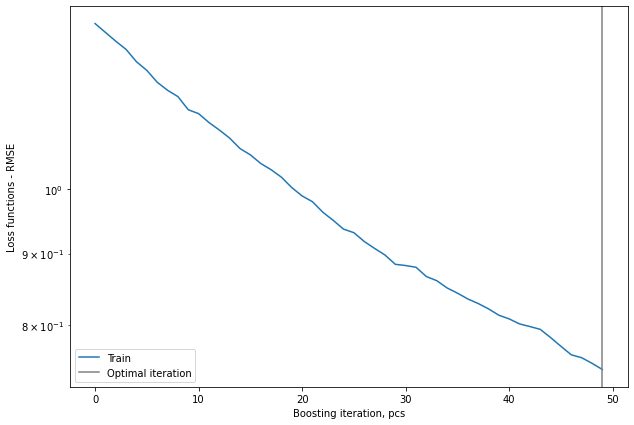

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.2
Relative bias(%):  -67.25
RMSE: 0.7
Relative RMSE(%):  -2.954
MSE: 0.6
R square: 54.2%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.008
a1: 0.380
R^2: 0.739
Uncertainty
a0: 0.008+/-0.025
a1: 0.380+/-0.022


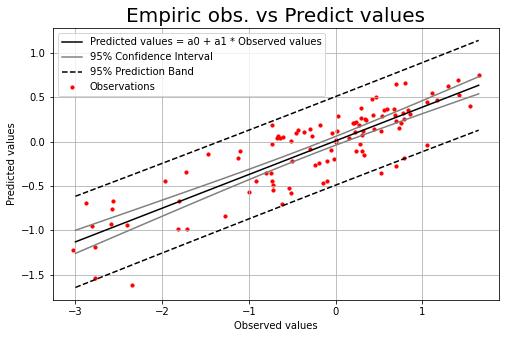

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

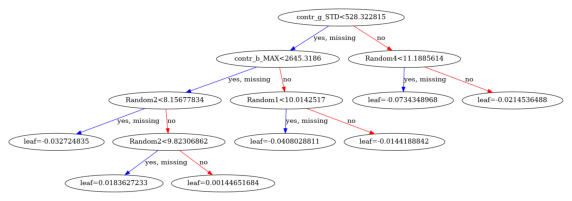

In [36]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

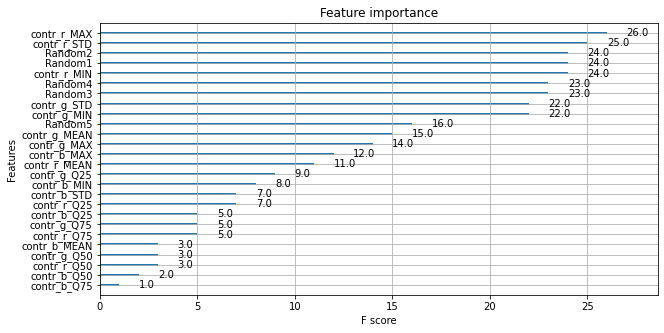

In [38]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

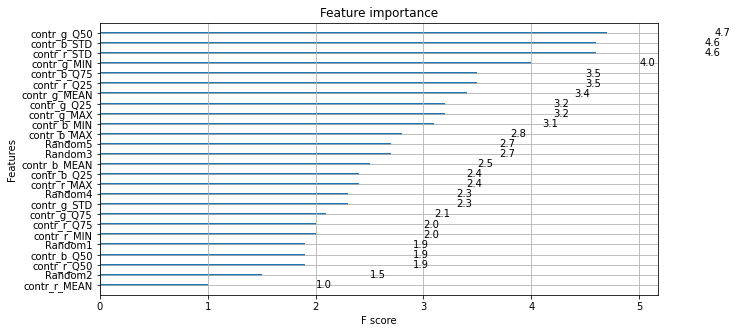

In [39]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

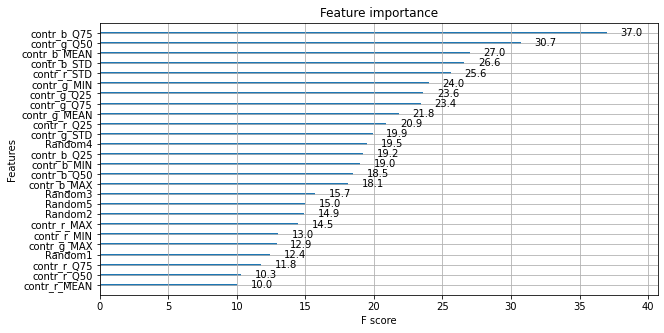

In [40]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


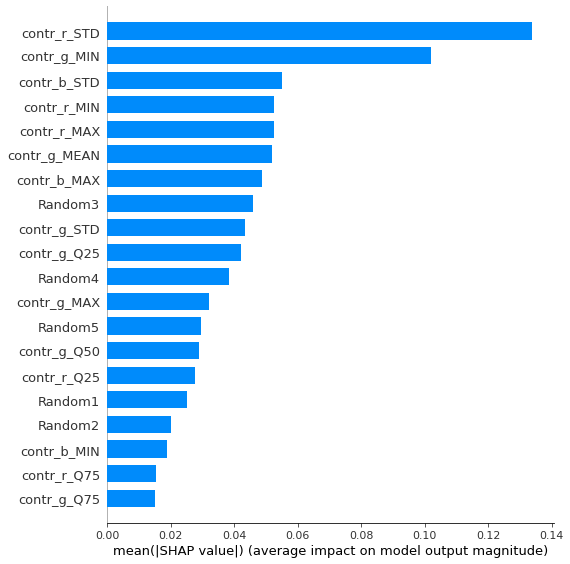

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

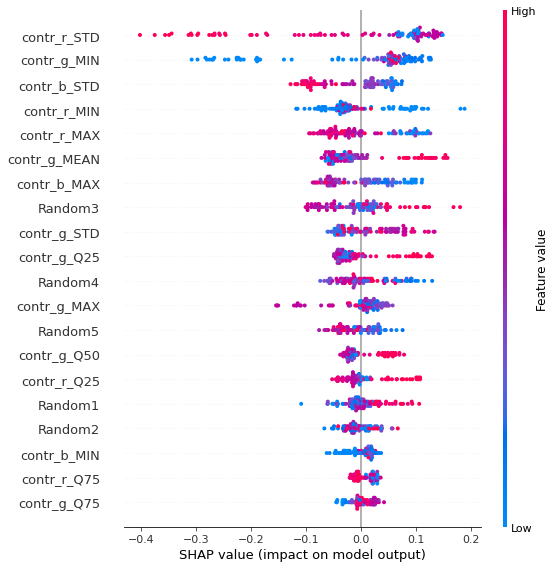

In [44]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

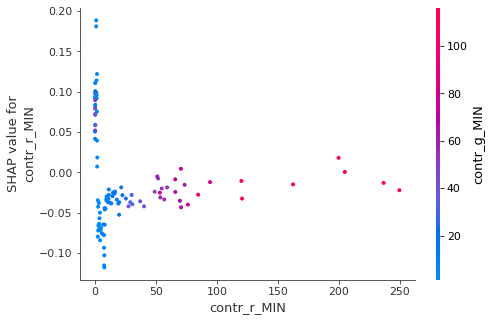

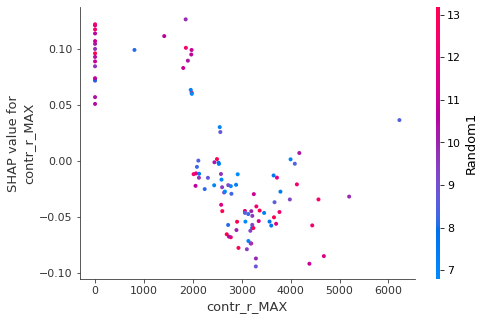

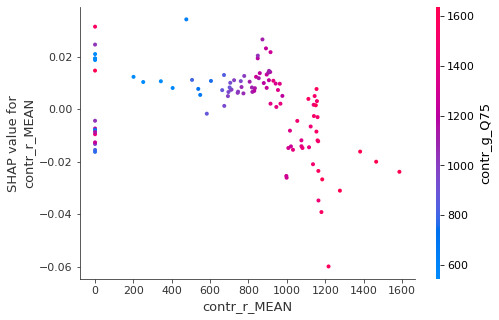

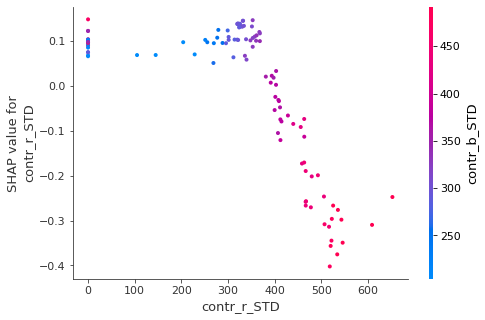

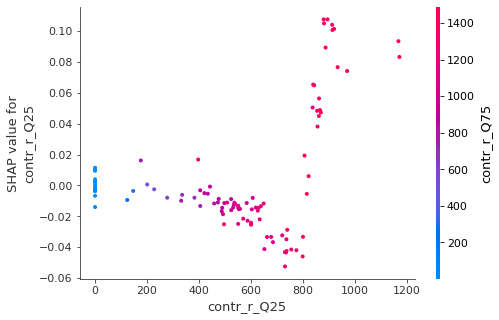

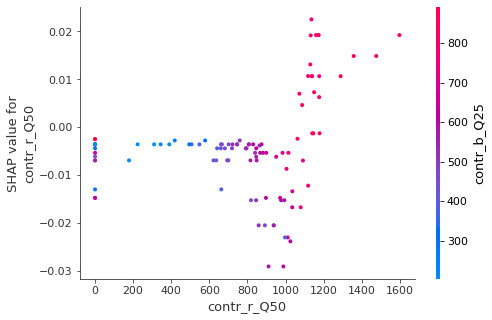

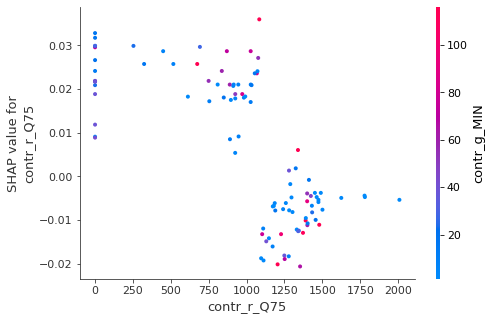

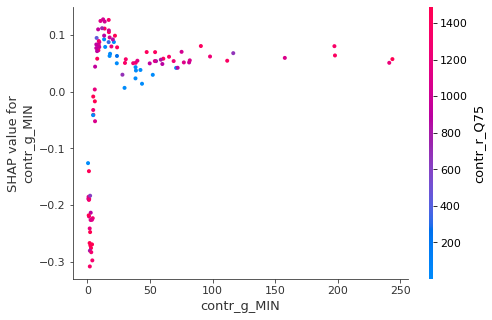

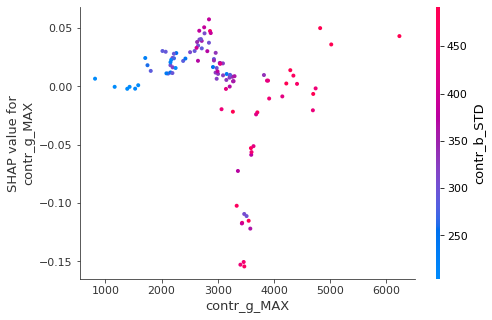

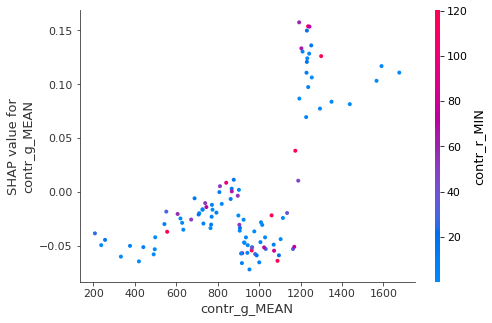

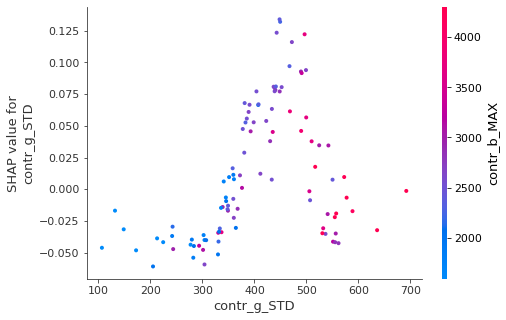

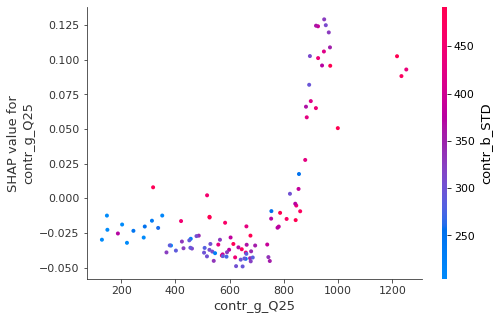

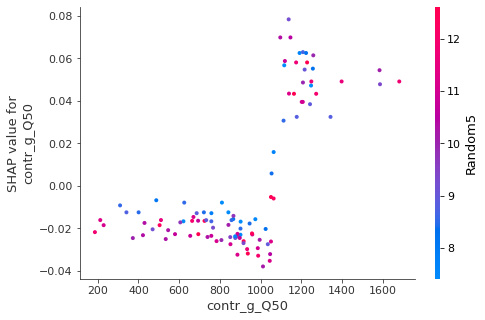

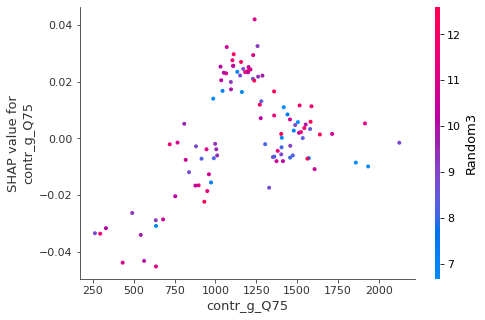

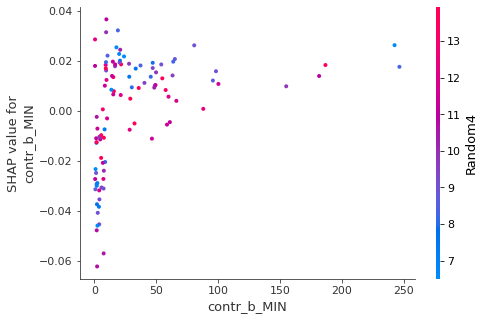

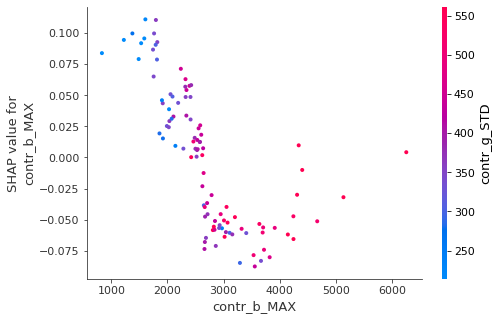

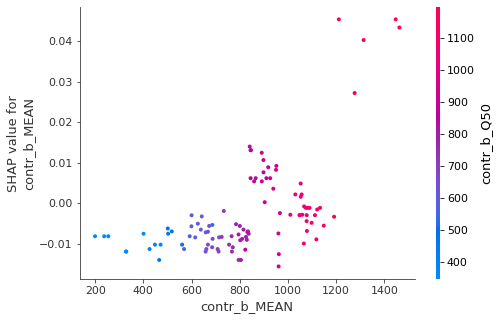

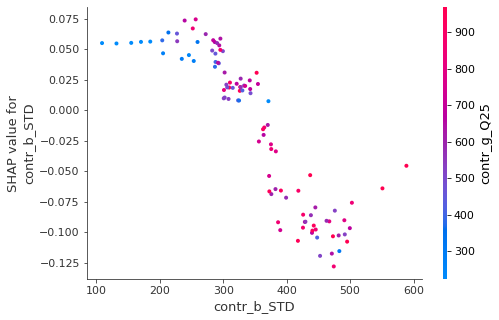

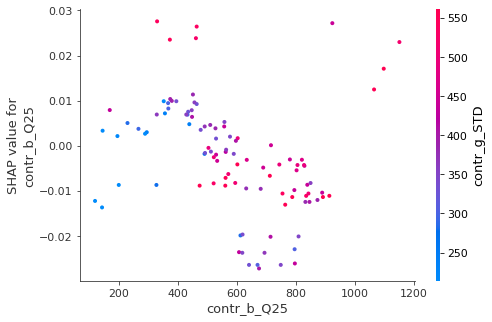

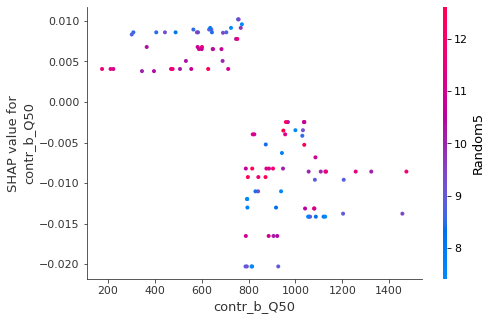

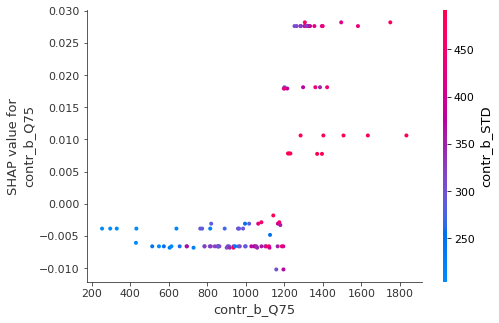

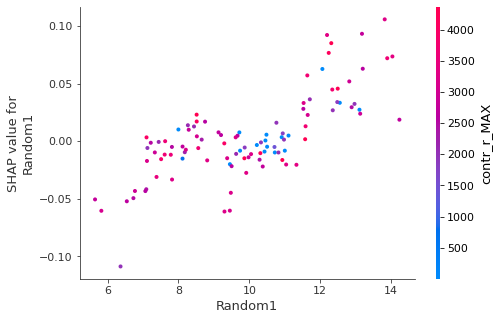

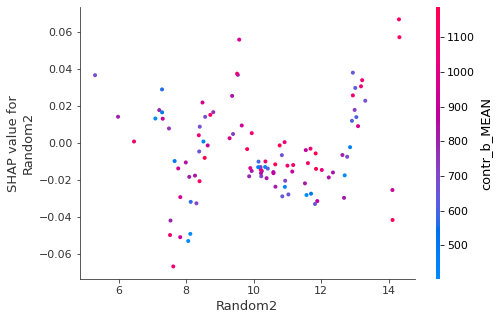

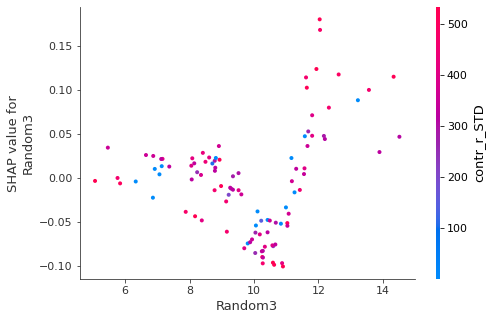

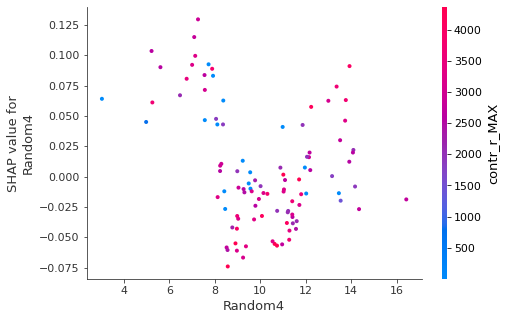

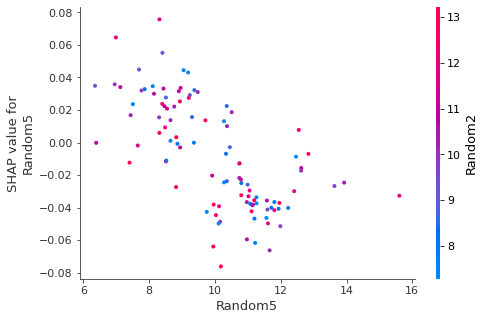

In [45]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.txt")